# Project 5: Exploratory Data Analysis

---

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

---

## Data Summary

In [2]:
df = pd.read_csv('./data/combined.csv')
df.head()

date                county   maxtempF   mintempF   avgtempF  totalSnow  \
0  2008-07  Santa Barbara County  89.129032  59.709677  80.548387        0.0   
1  2008-07      Calaveras County  96.419355  51.290323  87.032258        0.0   
2  2008-07      Calaveras County  96.419355  51.290323  87.032258        0.0   
3  2008-07      Calaveras County  96.419355  51.290323  87.032258        0.0   
4  2008-07      Calaveras County  96.419355  51.290323  87.032258        0.0   

       humid      wind  precip  q_avgtempF  q_avghumid  q_sumprecip  \
0  41.451613  7.354839     0.0   72.937634   34.079570     0.010000   
1  33.580645  5.387097     0.0   65.217204   38.434409     0.068065   
2  33.580645  5.387097     0.0   65.217204   38.434409     0.068065   
3  33.580645  5.387097     0.0   65.217204   38.434409     0.068065   
4  33.580645  5.387097     0.0   65.217204   38.434409     0.068065   

     sunHour       FIRE_NAME  CAUSE    lat    long   GIS_ACRES  
0  13.164516         no_fire    0.0  34.54 -120.04    0.000000  
1  14.022581      SERPENTINE    1.0  38.18 -120.56  176.763400  
2  14.022581  POOL 2 - MAIN    10.0  38.18 -120.56   73.444778  
3  14.022581          FRENCH   14.0  38.18 -120.56  101.074150  
4  14.022581           EVANS    6.0  38.18 -120.56  103.968050

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10988 entries, 0 to 10987
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         10988 non-null  object 
 1   county       10988 non-null  object 
 2   maxtempF     10988 non-null  float64
 3   mintempF     10988 non-null  float64
 4   avgtempF     10988 non-null  float64
 5   totalSnow    10988 non-null  float64
 6   humid        10988 non-null  float64
 7   wind         10988 non-null  float64
 8   precip       10988 non-null  float64
 9   q_avgtempF   10988 non-null  float64
 10  q_avghumid   10988 non-null  float64
 11  q_sumprecip  10988 non-null  float64
 12  sunHour      10988 non-null  float64
 13  FIRE_NAME    10988 non-null  object 
 14  CAUSE        10988 non-null  float64
 15  lat          10988 non-null  float64
 16  long         10988 non-null  float64
 17  GIS_ACRES    10988 non-null  float64
dtypes: float64(15), object(3)
memory usage: 1.5+ M

### Data Dictionary:
|Feature|Type|Description|
|---|---|---|
|**date**|*object*|The month and year of when the fire took place.|
|**county**|*object*|The county the fire started in.|
|**maxtempF**|*float*|The average maximum temperature of that month in °F.|
|**mintempF**|*float*|The average min temperature of that month in °F.|
|**avgtempF**|*float*|The average average temperature of that month in °F.|
|**totalSnow**|*float*|The total snow for that month.|
|**humid**|*float*|The average humidity for that month.|
|**wind**|*float*|The average wind for that month.|
|**precip**|*float*|The average precipitation for that month.|
|**q_avgtempF**|*float*|The quarterly average temperature in °F.|
|**q_avghumid**|*float*|The quarterly average humidity.|
|**q_sumprecip**|*float*|The quarterly average precipitation.|
|**sunHour**|*float*|The average hours of sun for that month.|
|**FIRE_NAME**|*object*|The name of the fire.|
|**CAUSE**|*float*|The cause of the fire.|
|**lat**|*float*|The latitude coordinate of the fire's location.|
|**long**|*float*|The longitude coordinate of the fire's location.|
|**GIS_ACRES**|*float*|The total number of acres burned.|

In [4]:
df.describe()

maxtempF      mintempF      avgtempF     totalSnow         humid  \
count  10988.000000  10988.000000  10988.000000  10988.000000  10988.000000   
mean      72.789618     49.036346     64.676692      0.087918     54.408352   
std       15.735935     11.425170     14.635490      0.420449     16.926551   
min       26.214286      0.642857     19.483871      0.000000     10.466667   
25%       61.056452     42.123560     53.870968      0.000000     41.165323   
50%       72.951075     49.633333     65.290323      0.000000     54.098387   
75%       85.032258     56.677419     75.900806      0.000000     67.903226   
max      110.935484     88.935484    102.612903      9.229108     95.935484   

               wind        precip    q_avgtempF    q_avghumid   q_sumprecip  \
count  10988.000000  10988.000000  10988.000000  10988.000000  1.098800e+04   
mean       5.583294      0.072370     61.760095     57.089738  2.660346e-01   
std        1.514516      0.133537     13.136071     15.399669  3.498030e-01   
min        2.354839      0.000000     22.195853     12.664516 -4.440892e-16   
25%        4.533333      0.003226     52.827688     46.095699  4.247312e-02   
50%        5.354839      0.020000     61.135663     57.857168  1.354839e-01   
75%        6.354839      0.080645     71.280824     69.275627  3.442684e-01   
max       14.129032      1.748387    100.311470     93.598694  3.619931e+00   

            sunHour         CAUSE           lat          long     GIS_ACRES  
count  10988.000000  10988.000000  10988.000000  10988.000000  1.098800e+04  
mean      11.292206      2.866582     37.667330   -120.600429  9.799023e+02  
std        2.113807      4.972688      2.277839      1.963197  1.478595e+04  
min        4.800000      0.000000     33.020000   -123.980000  0.000000e+00  
25%        9.796774      0.000000     36.230000   -122.040000  0.000000e+00  
50%       11.423333      0.000000     37.930000   -120.720000  0.000000e+00  
75%       13.274194      2.000000     39.270000   -119.750000  1.393641e+01  
max       14.500000     19.000000     41.750000   -115.360000  1.032699e+06

---

## Exploration and Analysis

Before we start looking and exploring our fire data, we need to get the data where a fire occurred. Currently, our data contains data for months when fires occurred and months where no fires occurred.

To do this, we will apply a filter to our data to only give us entires where the number of acres burned (`GIS_ACRES`) is greater than `zero`; this is because if `zero` acres were burned, then that means no fire occurred.

Once we have done that, we can plot a distribution of our fires by how many acres that fire burned.

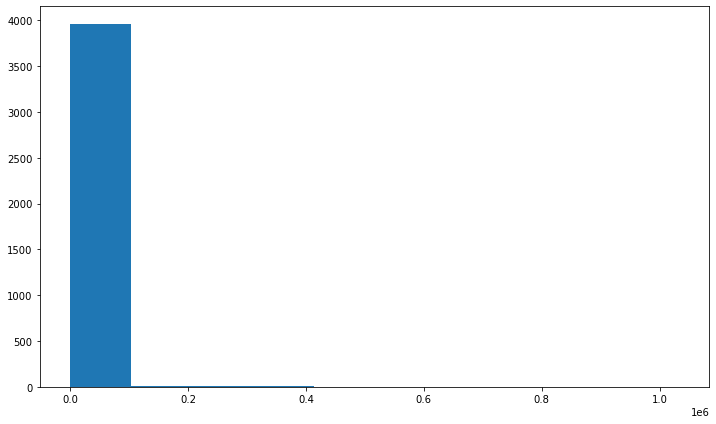

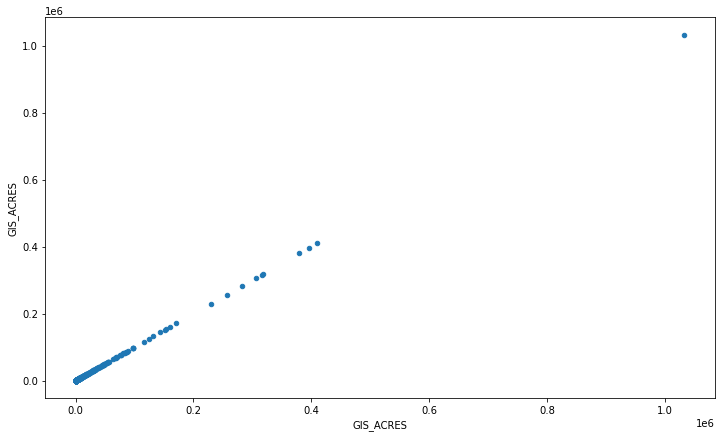

In [5]:
fire_df = df[df['GIS_ACRES'] > 0]

plt.figure(figsize=(12, 7))
plt.hist(fire_df['GIS_ACRES'])
fire_df.plot(kind='scatter', x='GIS_ACRES', y='GIS_ACRES', figsize=(12, 7));

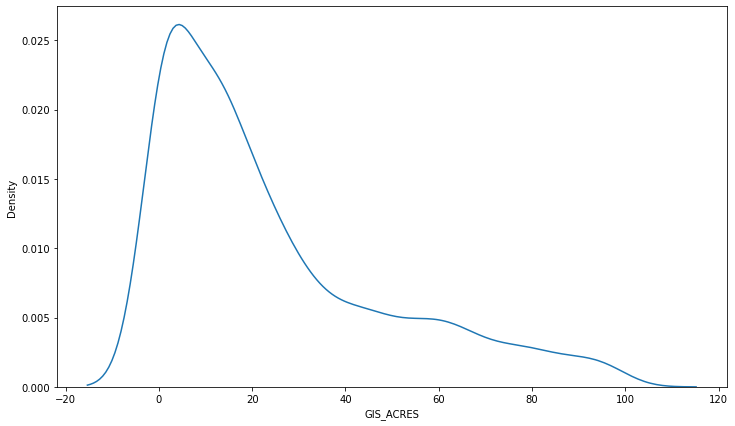

In [69]:
plt.figure(figsize=(12, 7))
sns.distplot(fire_df['GIS_ACRES'], hist=False,);

Looking at the three graphs depicting the distribution of the number of acres burned, we can see that most fires burn a smaller number of acres compared to the outliers we have. This means we should try and limit the upper bound of our data to remove the gigantic outliers we have in the `GIS_ACRES` we have.

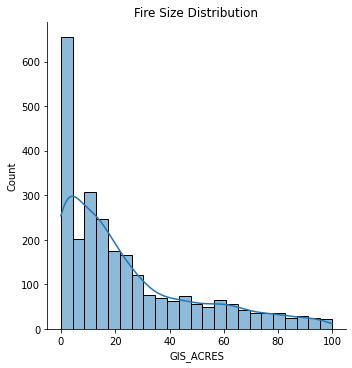

In [86]:
fig_1 = sns.displot(fire_df[fire_df['GIS_ACRES'] < 100]['GIS_ACRES'],
            kde=True,);
fig_1.set(title = "Fire Size Distribution");

As we can see, most fires that occurred in our data burned less than 100 acres. Going forward we shall bound our fire data to: `0 < GIS_ACRES < 100`.

In [28]:
fire_df = fire_df[fire_df['GIS_ACRES'] < 100]
fire_df.describe()

maxtempF     mintempF     avgtempF    totalSnow        humid  \
count  2624.000000  2624.000000  2624.000000  2624.000000  2624.000000   
mean     81.330914    53.973564    72.604849     0.017671    46.665333   
std      11.763966     9.013811    11.026539     0.124869    13.073656   
min      35.178571    17.964286    28.250000     0.000000    12.766667   
25%      73.800000    48.838710    66.200000     0.000000    37.032258   
50%      82.677419    54.000000    74.000000     0.000000    46.700000   
75%      89.166667    59.935484    80.133333     0.000000    54.975806   
max     108.451613    86.677419   102.064516     2.167894    87.354839   

              wind       precip   q_avgtempF   q_avghumid   q_sumprecip  \
count  2624.000000  2624.000000  2624.000000  2624.000000  2.624000e+03   
mean      5.187957     0.025802    61.737325    56.939250  2.756160e-01   
std       1.270393     0.051299    12.373971    14.901146  3.461555e-01   
min       2.500000     0.000000    27.922427    13.887097 -8.326673e-17   
25%       4.366667     0.000000    52.934581    46.707527  4.537634e-02   
50%       4.935484     0.006452    60.799283    57.659498  1.425922e-01   
75%       5.800000     0.029032    71.012186    68.579781  3.518433e-01   
max      11.433333     0.483871    98.055914    93.598694  3.619931e+00   

           sunHour        CAUSE          lat         long    GIS_ACRES  
count  2624.000000  2624.000000  2624.000000  2624.000000  2624.000000  
mean     12.463806     8.269055    37.059695  -120.105572    24.152576  
std       1.679422     5.286242     2.610631     1.978110    24.709823  
min       6.822581     1.000000    33.020000  -123.980000     0.001515  
25%      11.473333     2.000000    34.360000  -121.340000     4.363766  
50%      12.503226     9.000000    36.610000  -120.040000    15.401242  
75%      14.083871    14.000000    39.270000  -118.730000    35.613159  
max      14.500000    19.000000    41.750000  -115.360000    99.837486

As we can see, our standard deviation of our `GIS_ACRES` had decreased dramatically after limiting our scope to fires that burned less than 100 acres. We manages to decrease it from `14785.95` to `24.71`, giving us a much better distribution of our data.

Another thing we can look at is where the fires took place and how the are distributed on a map. Just looking at the latitude and longitude coordinates are hard to visualize on their own. But we can uses these value in conjunction with a python library called `folium`. `folium` is a library that will allow use to plot points on an interactive map. The map is stored in an html format.

When building the map, we can manipulate a few things to make reading the map easier. When we plot our points on the map, we can scale the size of the points in proportion to how many acres that fire burned. We can also add text to each point so that a user can get more information about a fire once they click on that point. **NOTE**: The map below has all the fires in the dataset despite how many acres the fire burned.

One of the things that would also be nice to see is the cause of each fire when you click on the point in the map. Currently the cause of each fire is `int` variable that is used to categorize the cause of each fire. Below is a table explaining what numbers stand for which causes.

|**Cause #**  | **Description**  |
|---|---|
| **0**  | No fire  |
| **1**  | Lightning  |
| **2**  | Equipment use  |
| **3**  | Smoking  |
| **4**  | Campfire  |
| **5**  | Debris  |
| **6**  | Railroad  |
| **7**  | Arson  |
| **8**  | Playing with fire  |
| **9**  | Miscellaneous  |
| **10**  | Vehicle  |
| **11** | Powerline  |
| **12**| Firefighter training  |
| **13**| Non-firefighter training |
| **14** | Unknown  |
| **15** | Structure|
| **16** | Aircraft|
| **18** | Escaped prescribed burn|
| **19** | Illegal alien campfire|

### Interactive Map

In [3]:
# Creating a copy of the main dataframe.
fire_map_data = df[df['GIS_ACRES'] > 0]

# Changing the cause of the fire from a number to it's corresponding cause.
cause_dict = {1: "Lightning",
              2: "Equipment Use",
              3: "Smoking",
              4: "Campfire",
              5: "Debris",
              6: "Railroad",
              7: "Arson",
              8: "Playing with Fire",
              9: "Miscellaneous",
              10: "Vehicle",
              11: "Powerline",
              12: "Firefighter Training",
              13: "None-Firefighter Training",
              14: "Unknown",
              15: "Structure",
              16: "Aircraft",
              18: "Escaped Prescribed Burn",
              19: "Illegal Alien Campfire"
}

fire_map_data['CAUSE'] = fire_map_data['CAUSE'].map(cause_dict)
fire_map_data.columns = map(str.lower, fire_map_data.columns)

# Setting Up Map Object.
fire_map = folium.Map(location=[37.50, -120.04], zoom_start=6)


# Adding Fires to Map.
for lat, long, cause, acres, date, name in zip(fire_map_data['lat'],
                                         fire_map_data['long'],
                                         fire_map_data['cause'],
                                         fire_map_data['gis_acres'],
                                         fire_map_data['date'],
                                         fire_map_data['fire_name']):
    folium.CircleMarker([lat, long],
                        radius=0.0001 * acres,
                        color = 'red',
                        fill_opacity=0.5,
                        fill=True,
                        popup=folium.Popup(f'<B>Fire Name:</B> {name.title()} <br>'
                                           f'<B>Fire Cause:</B> {cause} <br>'
                                           f'<B>Acres Burned:</B> {acres:.2f} <br>'
                                           f'<B>Date of Fire:</B> {date}',
                                           max_width=1000)
                         ).add_to(fire_map)

fire_map

In [4]:
# RUN THIS CELL ONLY ONCE!!!

# Save interactive fire map to an html file.
fire_map.save('interactive_cali_fire_map.html')

Next we can look at some `heatmaps` to check and see if there any strong correlations between some of the variables. We will also look as some `pairplot` as well. For the `pairplot` we will be dividing them up into two set of plots: monthly and quarterly. The quarterly data was engineered from the monthly data.

-------------------------------------- Monthly Data Pairplots --------------------------------------


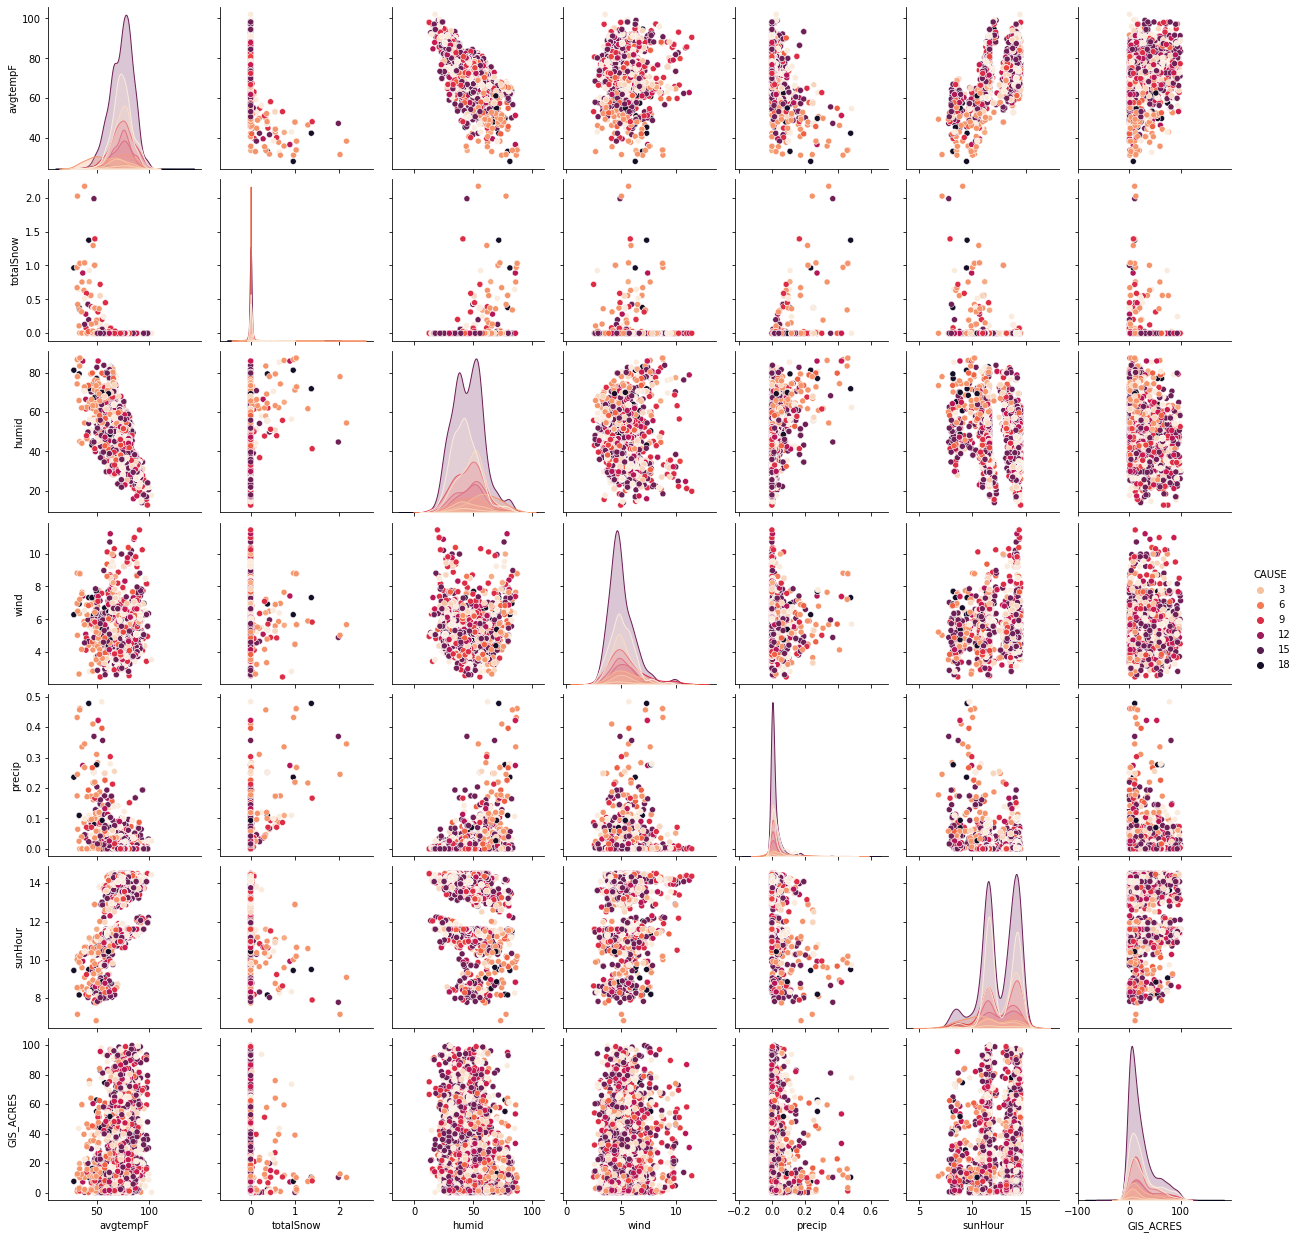

In [70]:
# Creating 2 sets of variables (Monthly and Quarterly)
d_features = ['avgtempF', 'totalSnow', 'humid', 'wind', 'precip', 'sunHour', 'CAUSE', 'GIS_ACRES']
q_features = ['q_avgtempF', 'q_avghumid', 'q_sumprecip', 'wind', 'sunHour', 'CAUSE', 'GIS_ACRES']

# Pairplots
print(f" Monthly Data Pairplots ".center(100, '-'))
sns.pairplot(fire_df[d_features], hue="CAUSE", palette='rocket_r');

------------------------------------- Quarterly Data Pairplots -------------------------------------


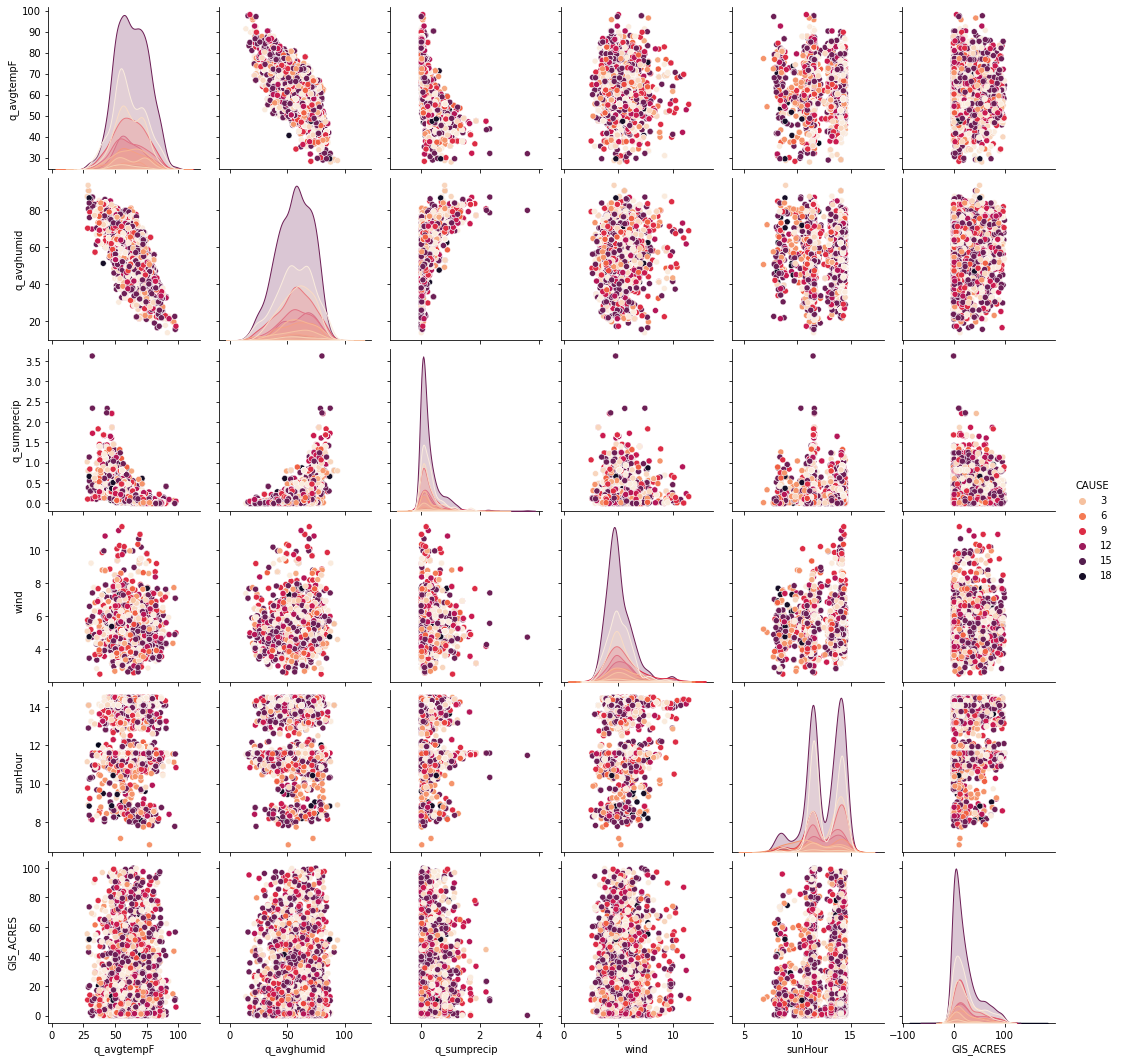

In [71]:
print(f" Quarterly Data Pairplots ".center(100, '-'))
sns.pairplot(fire_df[q_features], hue="CAUSE", palette='rocket_r');

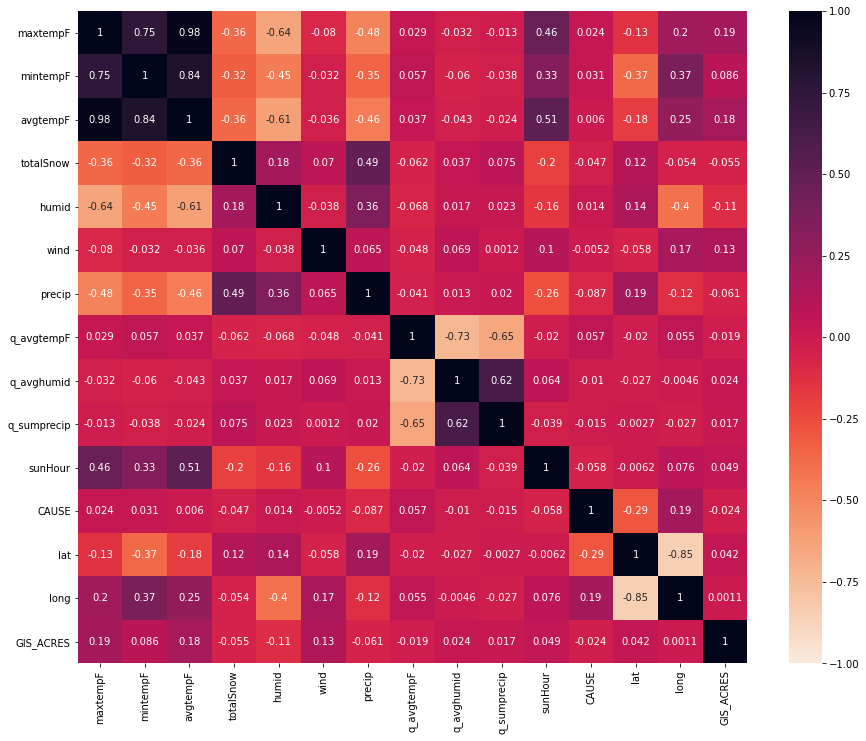

In [74]:
plt.figure(figsize=(15, 12))
sns.heatmap(fire_df.corr(), vmin=-1, vmax=1, annot=True, cmap='rocket_r');

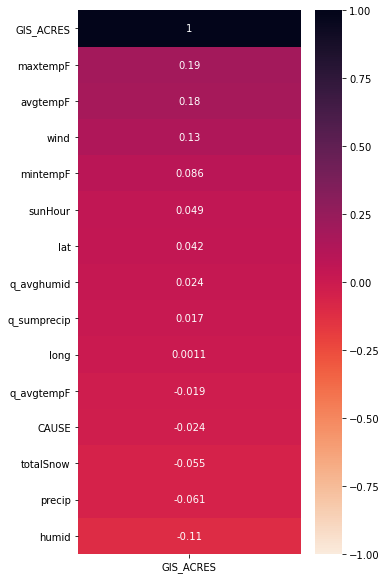

In [78]:
plt.figure(figsize=(5, 10))
sns.heatmap(fire_df.corr()[['GIS_ACRES']].sort_values(by='GIS_ACRES', ascending=False),
            vmin=-1,
            vmax=1,
            annot=True,
            cmap='rocket_r');

Looking at these scatter plots and heatmaps, when can see that there are no real strong correlations or patterns between variables that are independent from each other. There are some strong correlations in the heatmaps, but that is because the variables are depended (i.e. the total amount of snow and the precipitation levels).

Also we can see no clear patterns or distributions when looking at scatter plots with independent variables. This is true for both monthly data and quarterly data.

In [123]:
fire_df.sort_values(by='GIS_ACRES', ascending=False)[['county', 'FIRE_NAME', 'GIS_ACRES']].head(10)

county  FIRE_NAME  GIS_ACRES
1827      Riverside County     GILMAN  99.837486
7822         Shasta County    R-3 MUD  99.573639
9543  Santa Barbara County      RANGE  99.083054
2555      Riverside County    CABAZON  98.980995
4373           Napa County   HIGHLAND  98.822746
1378           Kern County  BRAMLETTE  98.147751
3369      Riverside County    FREEWAY  97.775436
6014           Lake County       DEER  97.552078
2455      Riverside County   CAHUILLA  97.545860
6020          Glenn County         36  97.439041

In [120]:
# Finding Top 10 Fires.
top_10_fires = fire_df.sort_values(by='GIS_ACRES', ascending=False).head(10)
top_10_fires['CAUSE'] = top_10_fires['CAUSE'].map(cause_dict)
top_10_fires.columns = map(str.lower, top_10_fires.columns)

# Setting Up Map Object
fire_map_2 = folium.Map(location=[37.50, -120.04], zoom_start=6)


# Adding Fires to Map.
for lat, long, cause, acres, date, name in zip(top_10_fires['lat'],
                                         top_10_fires['long'],
                                         top_10_fires['cause'],
                                         top_10_fires['gis_acres'],
                                         top_10_fires['date'],
                                         top_10_fires['fire_name']):
    folium.CircleMarker([lat, long],
                        radius=0.25 * acres,
                        color = 'red',
                        fill_opacity=0.5,
                        fill=True,
                        popup=folium.Popup(f'<B>Fire Name:</B> {name.title()} <br>'
                                           f'<B>Fire Cause:</B> {cause} <br>'
                                           f'<B>Acres Burned:</B> {acres:.2f} <br>'
                                           f'<B>Date of Fire:</B> {date}',
                                           max_width=1000)
                         ).add_to(fire_map_2)

fire_map_2

In [121]:
# Save interactive fire map to an html file.
fire_map_2.save('top_10_interactive_cali_fire_map.html')

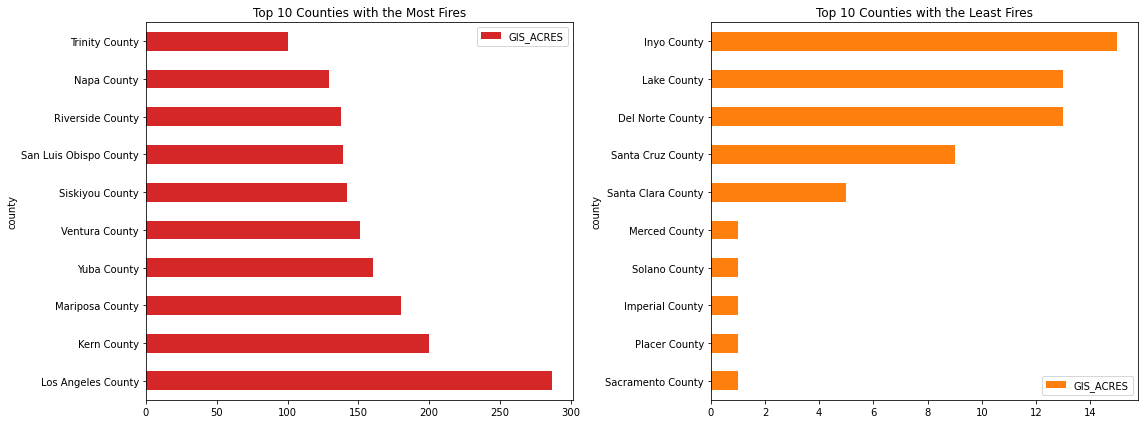

In [150]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), tight_layout=True)

(fire_df[['county','GIS_ACRES']]
 .groupby('county')
 .count()
 .sort_values(by='GIS_ACRES', ascending=False)
 .head(10)
 .plot(kind='barh', title='Top 10 Counties with the Most Fires', color='tab:red', ax=axes[0]))

(fire_df[['county','GIS_ACRES']]
 .groupby('county')
 .count()
 .sort_values(by='GIS_ACRES')
 .head(10)
 .plot(kind='barh', title='Top 10 Counties with the Least Fires', color='tab:orange', ax=axes[1]));

Finally let's see which counties have the most fires and which have the least. As you can see `Los Angeles County` has the most amount of fires while `Sacramento County` has the least. This might be due to `Los Angeles` being the largest city in California. Because of that there are more people which means there is a higher chance fire will occur.